In [349]:
import pickle #Módulo para almacenar colecciones y ficheros binarios

import scipy.stats #Contiene módulos para optimización, álgebra lineal, inegración, interpolación, funciones etc. 
import numpy as np #Librería para crear vectores y matrices
import pandas as pd #Librería para leer ficheros tipo CSV, Excel y bases de datos SQL.
pd.set_option('display.max_columns', None) #Añadir la totalidad de las columnas del dataset 
#y no distingir entre minúsculas y mayúsculas
import matplotlib as mpl #Módulo para generar gráficos
from sklearn import svm #Módulo para añadir algoritmo de clasificación y regresión
from sklearn import ensemble
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error #Módulo que incluye las métricas con las que se va a operar
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder #Módulo para el preprocesamiento (entrenamiento) de m. predictivos
from sklearn.tree import DecisionTreeClassifier #Módulo que permite entrenar árboles de decisión para problemas de 
#clasificación
from sklearn.linear_model import LinearRegression #Módulo para interpretar modelos de regresión lineal
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve #Módulo para ejecutar varias
#métricas y cálculos (ejemplo: tiempos de ajuste...)
from statsmodels.tsa.statespace.sarimax import SARIMAX #Módulo para ejecutar el modelo SARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf #Módulo para ejecutar gráficos y correlaciones. 

%matplotlib inline

In [350]:
df = pd.read_csv('GIR ORIGINAL.csv')
print("Number of rows and columns:", df.shape)
print("Column names:", list(df.columns))
df.head(3)

Number of rows and columns: (3636, 40)
Column names: ['codi_eoi', 'nom_estacio', 'data', 'magnitud', 'contaminant', 'unitats', 'tipus_estacio', 'area_urbana', 'codi_ine', 'municipi', 'codi_comarca', 'nom_comarca', 'h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24', 'altitud', 'latitud', 'longitud', 'geocoded_column']


,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
0,17079003,Girona (Escola de Música),2014-03-02T00:00:00.000,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,32.0,21.0,16.0,13.0,16.0,14.0,20.0,28.0,29.0,24.0,20.0,19.0,13.0,13.0,10.0,13.0,17.0,21.0,26.0,44.0,41.0,33.0,31.0,34.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)
1,17079003,Girona (Escola de Música),2014-05-27T00:00:00.000,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,17.0,20.0,16.0,14.0,14.0,18.0,17.0,19.0,24.0,36.0,30.0,21.0,20.0,24.0,22.0,18.0,17.0,31.0,35.0,37.0,29.0,43.0,35.0,23.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)
2,17079003,Girona (Escola de Música),2014-01-13T00:00:00.000,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,31.0,28.0,33.0,30.0,18.0,18.0,25.0,33.0,39.0,42.0,45.0,50.0,38.0,40.0,43.0,39.0,49.0,60.0,57.0,62.0,61.0,32.0,26.0,36.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)


In [351]:
df["data"] = pd.to_datetime(df["data"])
df.sort_values("data", inplace=True)
df.head(3)

,codi_eoi,nom_estacio,data,magnitud,contaminant,unitats,tipus_estacio,area_urbana,codi_ine,municipi,codi_comarca,nom_comarca,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24,altitud,latitud,longitud,geocoded_column
3170,17079003,Girona (Escola de Música),2011-05-19,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,19.0,11.0,22.0,15.0,19.0,25.0,31.0,45.0,57.0,34.0,30.0,33.0,26.0,19.0,19.0,21.0,26.0,38.0,30.0,33.0,33.0,33.0,31.0,46.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)
3130,17079003,Girona (Escola de Música),2011-05-20,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,32.0,27.0,24.0,27.0,21.0,24.0,31.0,38.0,48.0,56.0,37.0,35.0,34.0,29.0,24.0,26.0,29.0,33.0,34.0,35.0,43.0,47.0,60.0,45.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)
3124,17079003,Girona (Escola de Música),2011-05-21,8,NO2,µg/m3,traffic,urban,17079,Girona,20,Gironès,28.0,27.0,35.0,29.0,23.0,25.0,24.0,36.0,46.0,55.0,26.0,25.0,20.0,20.0,20.0,16.0,15.0,22.0,19.0,19.0,31.0,30.0,29.0,33.0,73,41.976378,2.8165,POINT (2.8165 41.976378000000004)


In [352]:
colNs_hourly_measurements = ["h%02d" % h for h in range(1,25)]
print(colNs_hourly_measurements)
df["mean_day"] = df[colNs_hourly_measurements].mean(axis=1)
df[["data", "mean_day"] + colNs_hourly_measurements].head()

['h01', 'h02', 'h03', 'h04', 'h05', 'h06', 'h07', 'h08', 'h09', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']


,data,mean_day,h01,h02,h03,h04,h05,h06,h07,h08,h09,h10,h11,h12,h13,h14,h15,h16,h17,h18,h19,h20,h21,h22,h23,h24
3170,2011-05-19,29.000000,19.0,11.0,22.0,15.0,19.0,25.0,31.0,45.0,57.0,34.0,30.0,33.0,26.0,19.0,19.0,21.0,26.0,38.0,30.0,33.0,33.0,33.0,31.0,46.0
3130,2011-05-20,34.958333,32.0,27.0,24.0,27.0,21.0,24.0,31.0,38.0,48.0,56.0,37.0,35.0,34.0,29.0,24.0,26.0,29.0,33.0,34.0,35.0,43.0,47.0,60.0,45.0
3124,2011-05-21,27.208333,28.0,27.0,35.0,29.0,23.0,25.0,24.0,36.0,46.0,55.0,26.0,25.0,20.0,20.0,20.0,16.0,15.0,22.0,19.0,19.0,31.0,30.0,29.0,33.0
3031,2011-05-22,22.083333,33.0,28.0,30.0,24.0,26.0,23.0,27.0,20.0,20.0,21.0,28.0,19.0,14.0,11.0,8.0,10.0,14.0,16.0,17.0,22.0,22.0,29.0,34.0,34.0
3181,2011-05-23,33.041667,44.0,35.0,20.0,13.0,15.0,20.0,26.0,30.0,43.0,57.0,61.0,37.0,32.0,22.0,27.0,30.0,26.0,31.0,34.0,37.0,39.0,44.0,30.0,40.0


In [353]:
print("Number of rows before:", df.shape[0])
df = df[df[colNs_hourly_measurements].isna().sum(axis=1)<5]
print("Number of rows after:", df.shape[0])

Number of rows before: 3636
Number of rows after: 3547


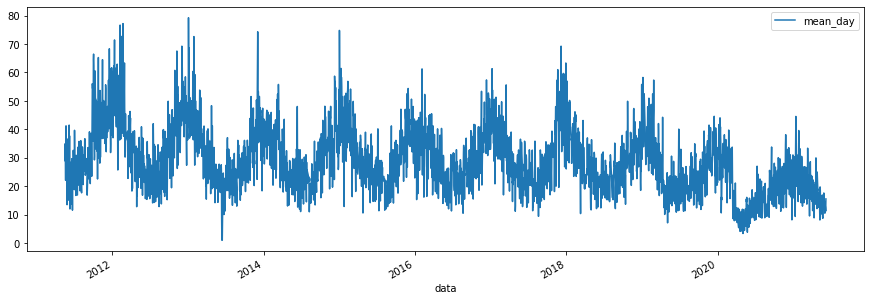

In [354]:
data = df[["data", "mean_day"]].set_index("data")
data.plot(figsize=(15, 5));

<AxesSubplot:xlabel='data'>

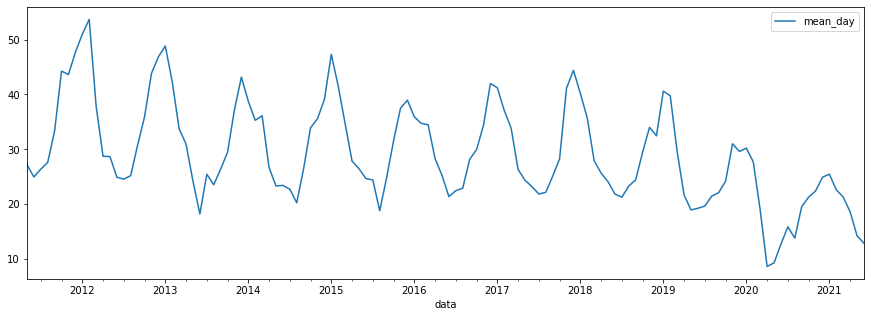

In [355]:
data = df[["data", "mean_day"]].set_index("data").resample("1M").mean()
data.plot(figsize=(15, 5))

In [356]:
date_min_test = "2018-01-01"
TEST_SIZE = len(data[data.index>=date_min_test])

train, test = data.iloc[:-TEST_SIZE], data.iloc[-TEST_SIZE:]

x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((80, 1), (80,), (42, 1), (42,))

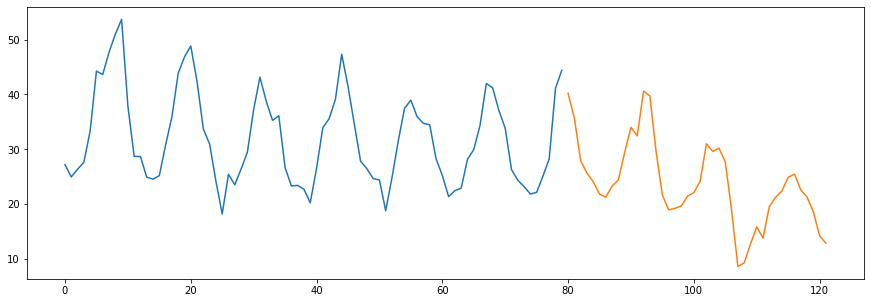

In [357]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test);

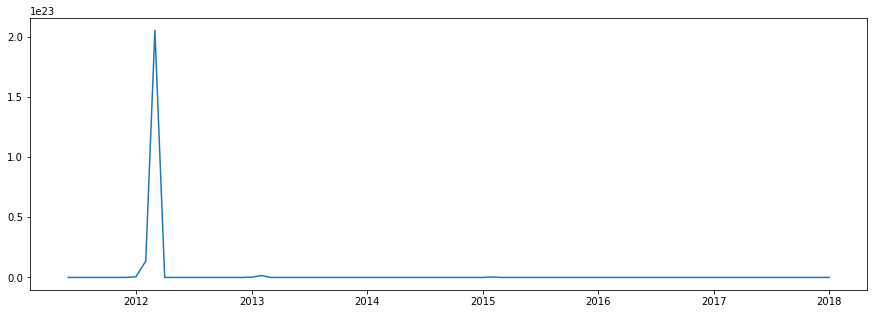

In [358]:
# transformacion exponencial
transExpo = np.exp(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(transExpo)

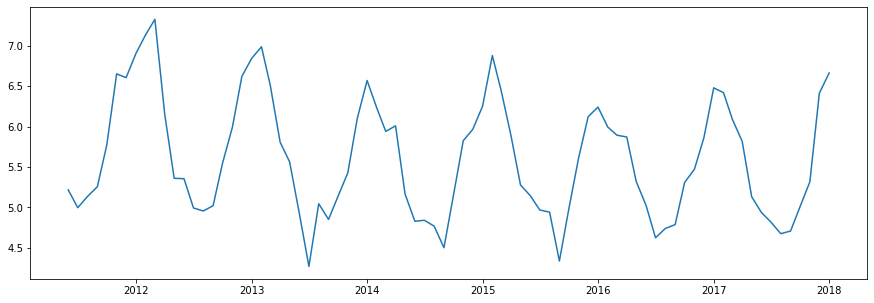

In [359]:
# transformación raiz
trnasSq = np.sqrt(train['mean_day'])

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(trnasSq)

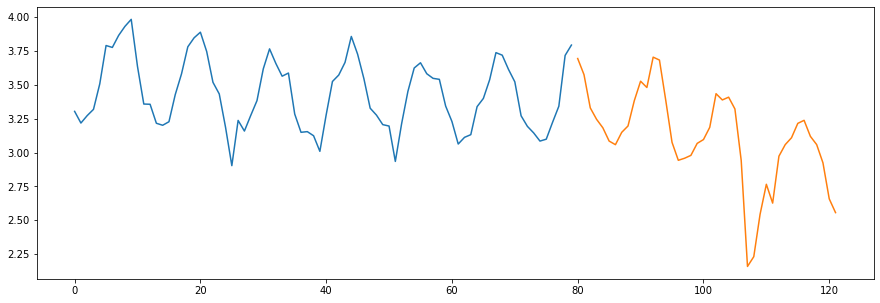

In [360]:
data["log_ret"] = np.log(data['mean_day'])
data1 = data[["log_ret"]]

train, test = data1.iloc[:-TEST_SIZE], data1.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data1.shape[0]))

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

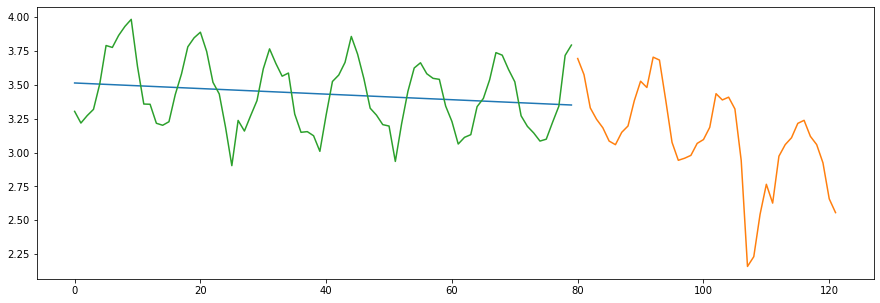

In [361]:
train = train.fillna(train.mean())
X = x_train
X = np.reshape(X, (len(X), 1))
y = train["log_ret"].tolist()

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, trend)
ax.plot(x_test, test)
ax.plot(x_train, train)

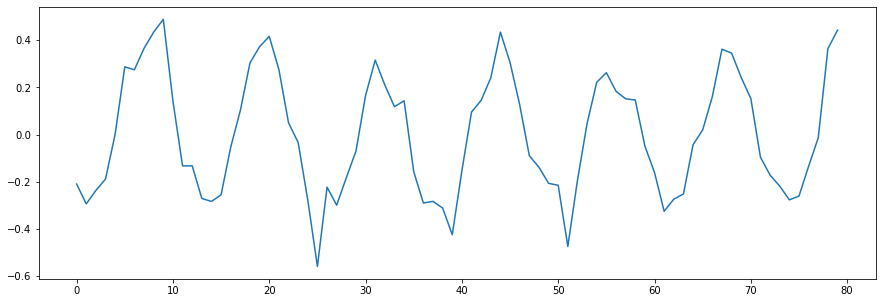

In [362]:
detrended = [y[i]-trend[i] for i in range(0, len(train))]
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(detrended)

In [363]:
for i in range(1, len(train["log_ret"].tolist())-1):
    edited = detrended[i:]
    original = train["log_ret"].tolist()[:-i]
    r = np.corrcoef(edited, original)
    print("--------------------------")
    print("serie "+str(i))
    print(r)


--------------------------
serie 1
[[1.         0.78127222]
 [0.78127222 1.        ]]
--------------------------
serie 2
[[1.         0.43168883]
 [0.43168883 1.        ]]
--------------------------
serie 3
[[1.         0.03416235]
 [0.03416235 1.        ]]
--------------------------
serie 4
[[ 1.         -0.37531493]
 [-0.37531493  1.        ]]
--------------------------
serie 5
[[ 1.         -0.70692476]
 [-0.70692476  1.        ]]
--------------------------
serie 6
[[ 1.         -0.84800623]
 [-0.84800623  1.        ]]
--------------------------
serie 7
[[ 1.         -0.76053889]
 [-0.76053889  1.        ]]
--------------------------
serie 8
[[ 1.         -0.45066768]
 [-0.45066768  1.        ]]
--------------------------
serie 9
[[ 1.         -0.02810286]
 [-0.02810286  1.        ]]
--------------------------
serie 10
[[1.         0.43160265]
 [0.43160265 1.        ]]
--------------------------
serie 11
[[1.         0.74697288]
 [0.74697288 1.        ]]
--------------------------
s

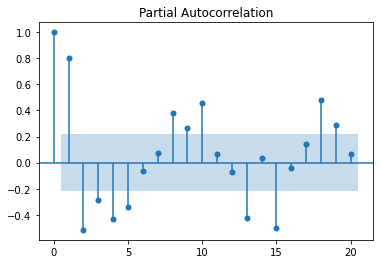

In [364]:
plot_pacf(train)
plt.show()

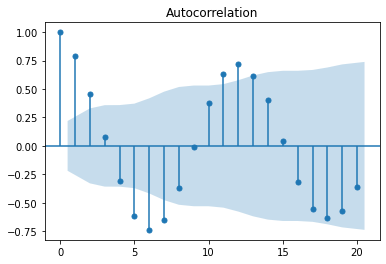

In [365]:
plot_acf(train)
plt.show()

In [366]:
my_order = (5, 0, 4)
my_seasonal_order = (5, 0, 4, 11)
model = SARIMAX(detrended, order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 11)   Log Likelihood                  86.284
Date:                            Mon, 14 Jun 2021   AIC                           -134.568
Time:                                    20:31:19   BIC                            -89.309
Sample:                                         0   HQIC                          -116.423
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6636      0.355      1.868      0.062      -0.033       1.360
ar.L2          0.4184      0.514   

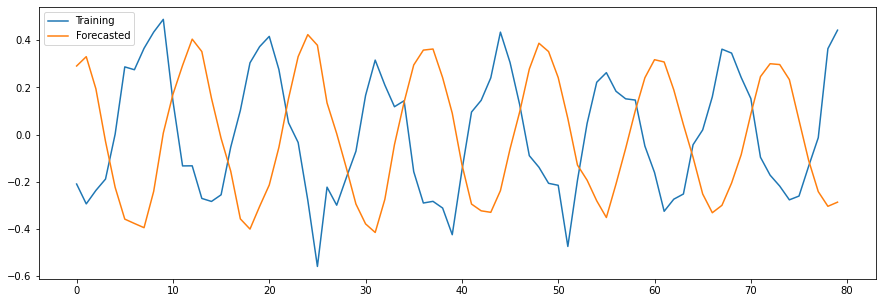

In [367]:
pred_u2 = results.get_forecast(steps=len(train))
actual = detrended
forecasted_EtEs = pred_u2.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_train, forecasted_EtEs, label="Forecasted")
ax.legend()
plt.draw()

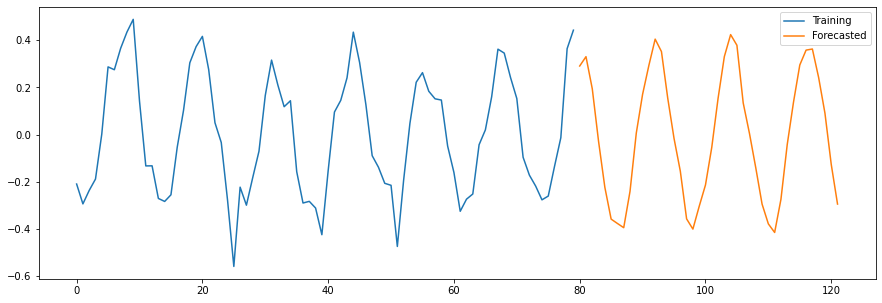

In [368]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted_last = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, detrended, label="Training")
ax.plot(x_test, forecasted_last, label="Forecasted")

ax.legend()
plt.show()

In [369]:
my_order =(5, 0, 4)
my_seasonal_order = (5, 0, 4, 11)
model = SARIMAX(train["log_ret"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 11)   Log Likelihood                  67.210
Date:                            Mon, 14 Jun 2021   AIC                            -96.419
Time:                                    20:31:29   BIC                            -51.161
Sample:                                         0   HQIC                           -78.274
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0423      0.254      4.107      0.000       0.545       1.540
ar.L2          0.9796      0.481   

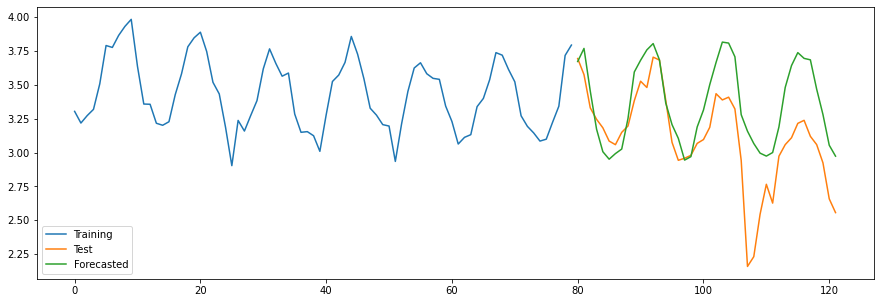

In [370]:
pred_u3 = results.get_forecast(steps=len(test))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [371]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 0.277229
R2: -0.002785


In [372]:
data2 = df[["data", "mean_day"]].set_index("data").resample("1M").mean()

train, test = data2.iloc[:-TEST_SIZE], data2.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data2.shape[0]))

my_order =(5, 0, 4)
my_seasonal_order = (5, 0, 4, 11)
model = SARIMAX(train["mean_day"].tolist(), order = my_order, seasonal_order=my_seasonal_order)
results = model.fit()
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   80
Model:             SARIMAX(5, 0, 4)x(5, 0, 4, 11)   Log Likelihood                -210.326
Date:                            Mon, 14 Jun 2021   AIC                            458.651
Time:                                    20:31:37   BIC                            503.910
Sample:                                         0   HQIC                           476.797
                                             - 80                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2640      0.227      5.577      0.000       0.820       1.708
ar.L2          0.3252      0.431   

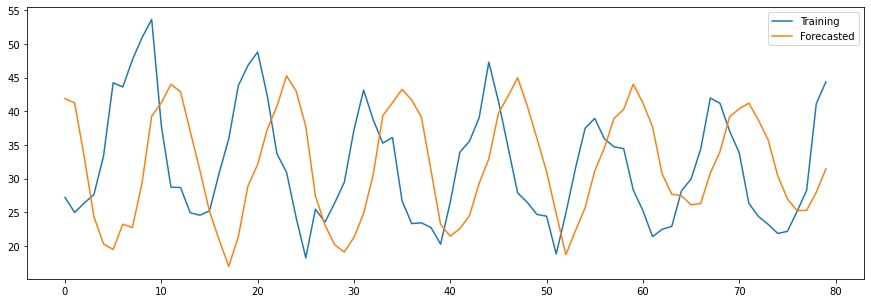

In [373]:
pred_u3 = results.get_forecast(steps=len(train))
actual = detrended
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_train, forecasted, label="Forecasted")

ax.legend()
plt.show()

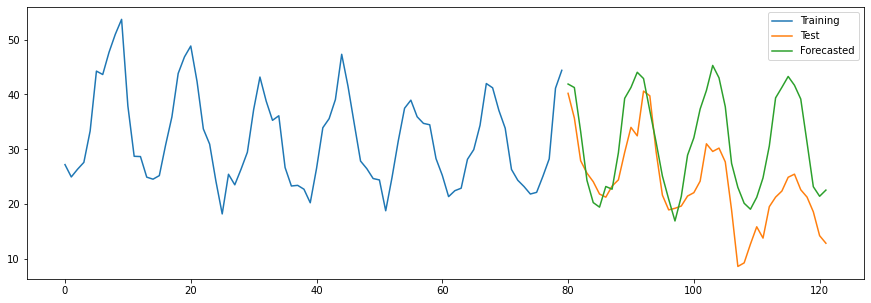

In [374]:
pred_u3 = results.get_forecast(steps=len(test))
forecasted = pred_u3.predicted_mean

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train, label="Training")
ax.plot(x_test, test, label="Test")
ax.plot(x_test, forecasted, label="Forecasted")

ax.legend()
plt.show()

In [375]:
mae = mean_absolute_error(test, forecasted)
print('MAE: %f' % mae)

r2 = r2_score(test, forecasted)
print('R2: %f' % r2)

MAE: 8.052529
R2: -0.584920
